In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})

In [3]:
sns.set_style("white")

In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [5]:
print(len(cols.split(',')))

41


In [6]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [7]:
ism_df = pd.read_csv('../Datasets/Kdd_Cup/kddcup.data_10_percent.gz',names=columns)

In [8]:
ism_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
ism_df['Attack Type'] = ism_df.target.apply(lambda r:attacks_types[r[:-1]])

In [10]:
ism_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [105]:
ism_df[ism_df['Attack Type'] =='r2l']

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,0.0,1.0,0.0,0.0,1,2,0.00,1.00,1.00,r2l
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,0.0,1.0,0.0,0.0,1,1,0.00,1.00,0.00,r2l
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,0.5,1.0,0.0,0.0,2,2,0.00,0.50,0.00,r2l
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,1.0,0.0,0.0,3,3,0.00,0.33,0.00,r2l
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,1.0,0.0,0.0,4,4,0.00,0.25,0.00,r2l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148955,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,11,0.00,1.00,0.45,r2l
148956,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.0,1.0,0.0,0.0,2,12,0.00,1.00,0.42,r2l
148964,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,13,0.00,1.00,0.46,r2l
148965,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.0,1.0,0.0,0.0,2,14,0.00,1.00,0.43,r2l


In [13]:
# Printing the general info of the dataset
ism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [14]:
temp_list = ism_df['target'].value_counts()
count_list = []
for i in range(len(temp_list)):
    count_list.append(temp_list[i])

temp_list_attack_type = ism_df['Attack Type'].value_counts()
count_list_attack_type = []
for i in range(len(temp_list_attack_type)):
    count_list_attack_type.append(temp_list_attack_type[i])

temp_list_protocol_type = ism_df['protocol_type'].value_counts()
count_list_protocol_type = []
for i in range(len(temp_list_protocol_type)):
    count_list_protocol_type.append(temp_list_protocol_type[i])

temp_list_flag_type = ism_df['flag'].value_counts()
count_list_flag_type = []
for i in range(len(temp_list_flag_type)):
    count_list_flag_type.append(temp_list_flag_type[i])

temp_list_service_type = ism_df['service'].value_counts()
count_list_service_type = []
for i in range(len(temp_list_service_type)):
    count_list_service_type.append(temp_list_service_type[i])

In [16]:
# Checking if there is any null value present.
ism_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
# Finding categorical features
num_cols = ism_df._get_numeric_data().columns

In [18]:
print(num_cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [19]:
# Printing all the categorical columns
print(set(ism_df.columns)-set(num_cols))

{'service', 'flag', 'protocol_type', 'Attack Type', 'target'}


# Exploratory Data Analysis

In [25]:
ism_df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [26]:
ism_df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [27]:
ism_df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
tftp_u          1
red_i           1
pm_dump         1
Name: service, Length: 66, dtype: int64

In [28]:
ism_df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [29]:
ism_df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

Text(0.5, 1.0, 'Targets And Their Counts')

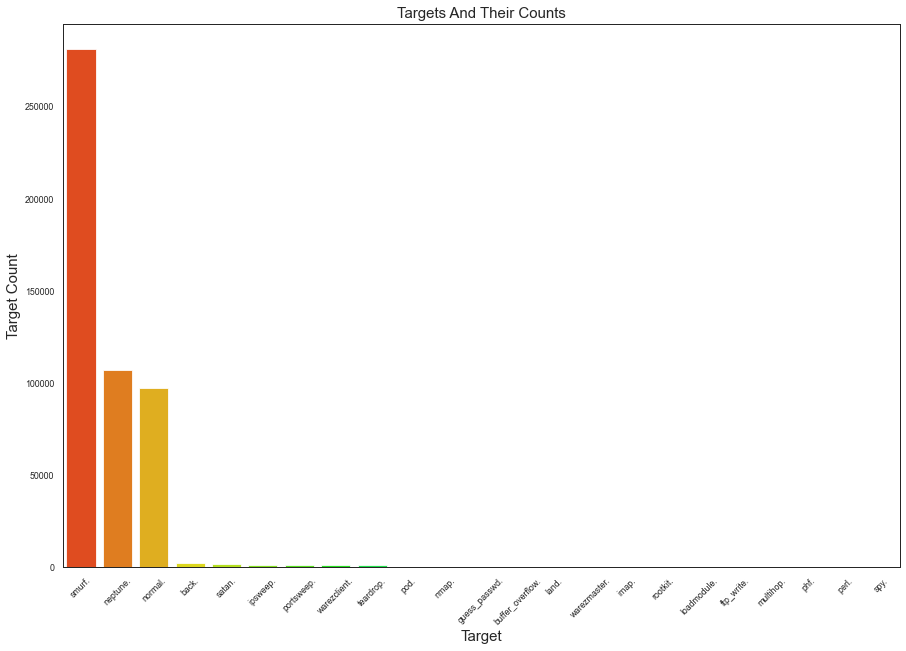

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(ism_df['target'].value_counts()).index, y=pd.Series(count_list), palette ='hsv')
plt.xticks(rotation= 45)
plt.xlabel('Target')
plt.ylabel('Target Count')
plt.title('Targets And Their Counts')

Text(0.5, 1.0, 'Attack Types And Their Counts')

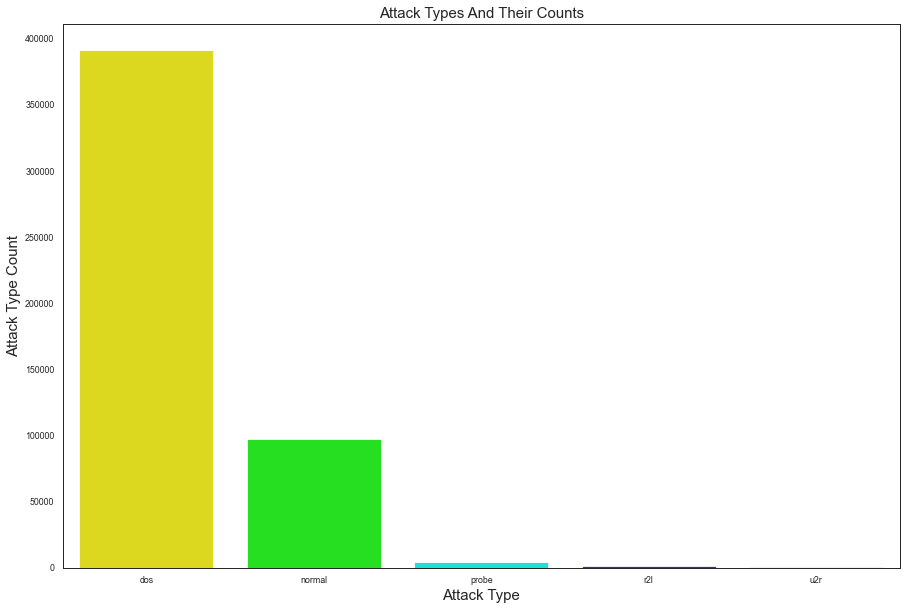

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(ism_df['Attack Type'].value_counts()).index, y=pd.Series(count_list_attack_type), palette ='hsv')
plt.xlabel('Attack Type')
plt.ylabel('Attack Type Count')
plt.title('Attack Types And Their Counts')

Text(0.5, 1.0, 'Protocol Types And Their Counts')

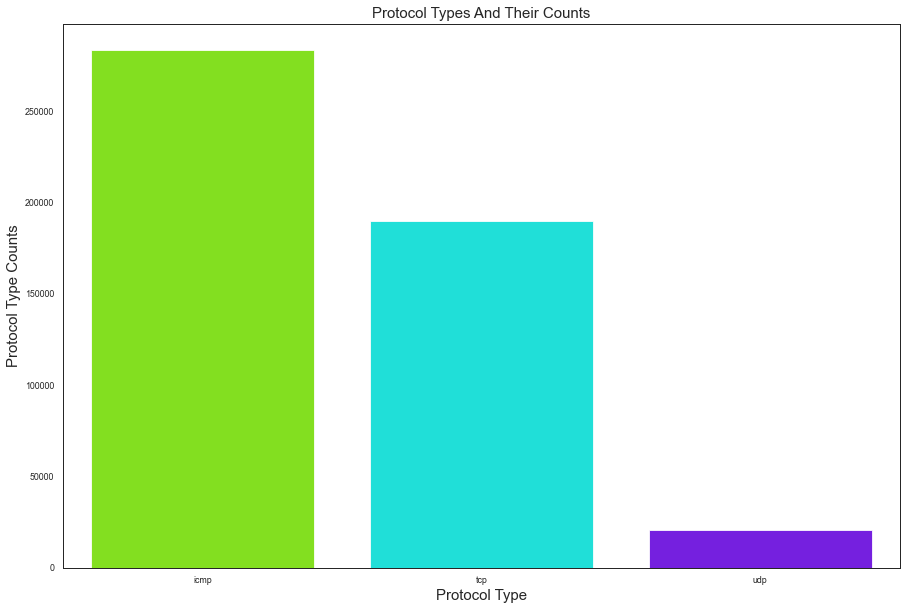

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(ism_df['protocol_type'].value_counts()).index, y=pd.Series(count_list_protocol_type), palette ='hsv')
plt.xlabel('Protocol Type')
plt.ylabel('Protocol Type Counts')
plt.title('Protocol Types And Their Counts')

Text(0.5, 1.0, 'Flag Types And Their Counts')

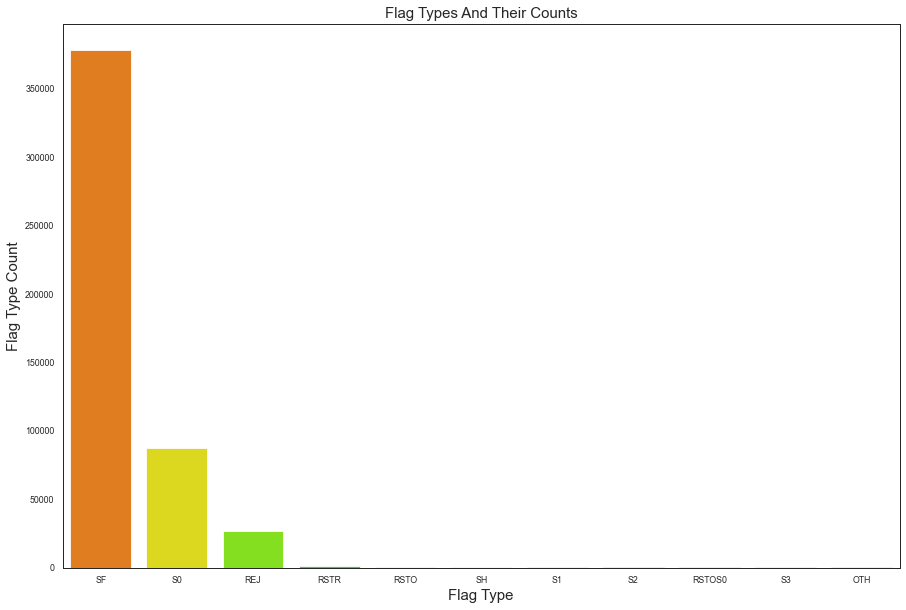

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(ism_df['flag'].value_counts()).index, y=pd.Series(count_list_flag_type), palette ='hsv')
plt.xlabel('Flag Type')
plt.ylabel('Flag Type Count')
plt.title('Flag Types And Their Counts')

Text(0.5, 1.0, 'Service Types And Their Counts')

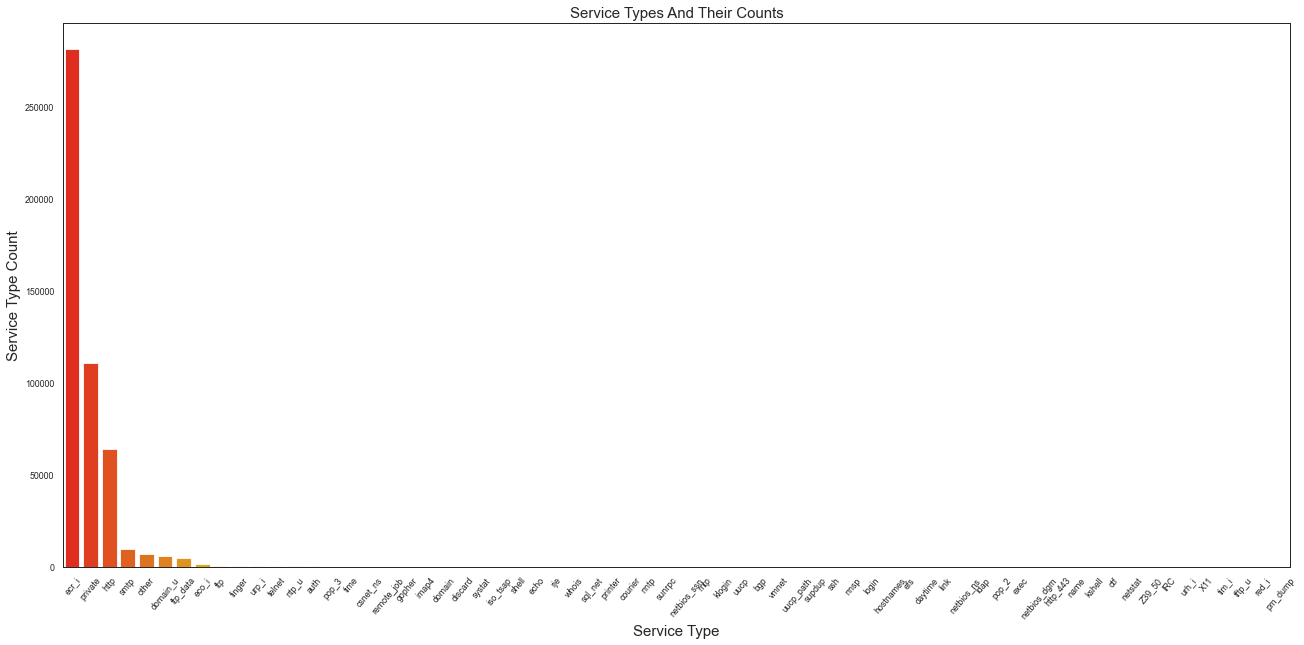

In [34]:
plt.figure(figsize=(22,10))
sns.barplot(x=pd.Series(ism_df['service'].value_counts()).index, y=pd.Series(count_list_service_type), palette ='hsv')
plt.xticks(rotation= 50)
plt.xlabel('Service Type')
plt.ylabel('Service Type Count')
plt.title('Service Types And Their Counts')

<AxesSubplot:>

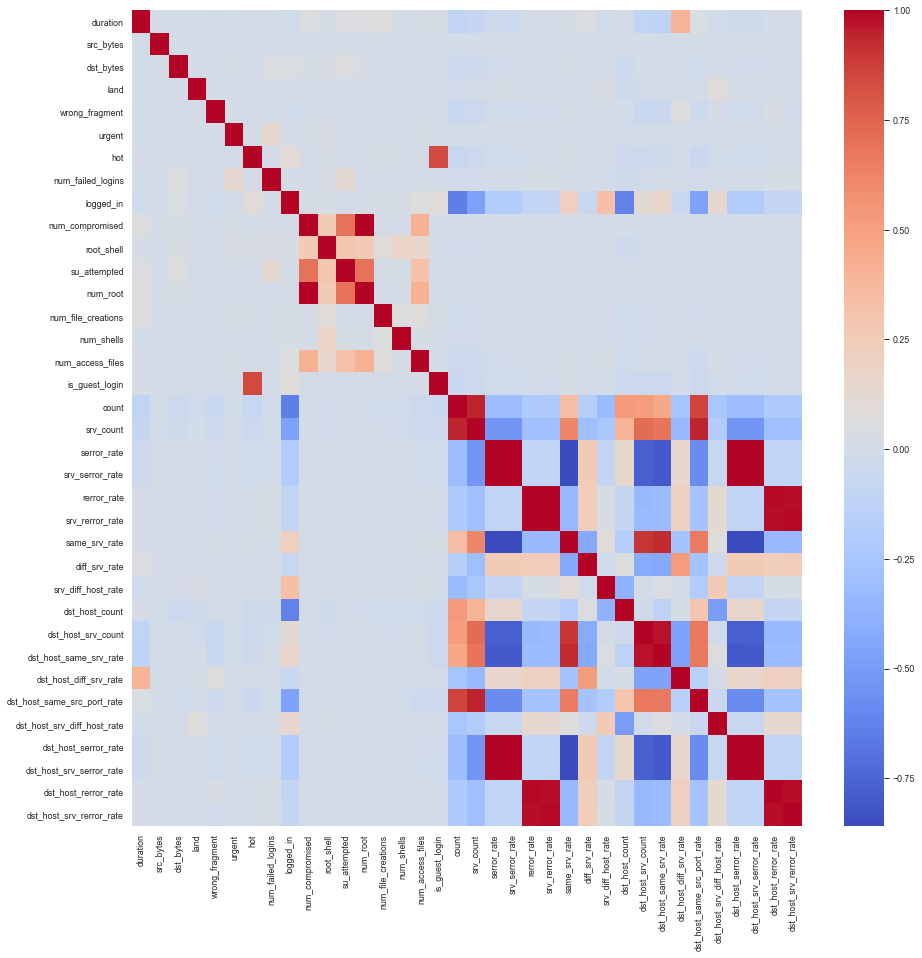

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data=ism_df.drop(['is_host_login','num_outbound_cmds'],axis = 1).corr(),cmap='coolwarm')

# Correlation Sorting

In [38]:
ism_df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


In [39]:
c = ism_df.corr()
s = c.unstack()
s = s.dropna()
so = s.sort_values(kind='quicksort')

In [40]:
top_corr = []
top_corr_index = []
for i in range(len(so)):
    if so[i] > 0.99 and so[i] < 1.0:
        top_corr.append(so[i])
        top_corr_index.append(i)
print(top_corr)
print("*----------------------------------------------------------------------------------------------*")
print(top_corr_index)

[0.9938277978855619, 0.9938277978855619, 0.994730953976896, 0.994730953976896, 0.9978353003828665, 0.9978353003828665, 0.9978492485717336, 0.9978492485717336, 0.9981559173419998, 0.9981559173419998, 0.9983615072774075, 0.9983615072774075, 0.9986729680059853, 0.9986729680059853, 0.9993041091814926, 0.9993041091814926]
*----------------------------------------------------------------------------------------------*
[1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259]


In [42]:
print(so[1244:1260])

num_root                  num_compromised             0.993828
num_compromised           num_root                    0.993828
srv_rerror_rate           rerror_rate                 0.994731
rerror_rate               srv_rerror_rate             0.994731
dst_host_serror_rate      srv_serror_rate             0.997835
srv_serror_rate           dst_host_serror_rate        0.997835
serror_rate               dst_host_srv_serror_rate    0.997849
dst_host_srv_serror_rate  serror_rate                 0.997849
                          dst_host_serror_rate        0.998156
dst_host_serror_rate      dst_host_srv_serror_rate    0.998156
srv_serror_rate           serror_rate                 0.998362
serror_rate               srv_serror_rate             0.998362
dst_host_serror_rate      serror_rate                 0.998673
serror_rate               dst_host_serror_rate        0.998673
dst_host_srv_serror_rate  srv_serror_rate             0.999304
srv_serror_rate           dst_host_srv_serror_rate    0

In [46]:
temp_list_logged_in = ism_df['logged_in'].value_counts()
count_list_logged_in = []
for i in range(len(temp_list_logged_in)):
    count_list_logged_in.append(temp_list_logged_in[i])

Text(0.5, 1.0, 'Logged In Types And Their Counts')

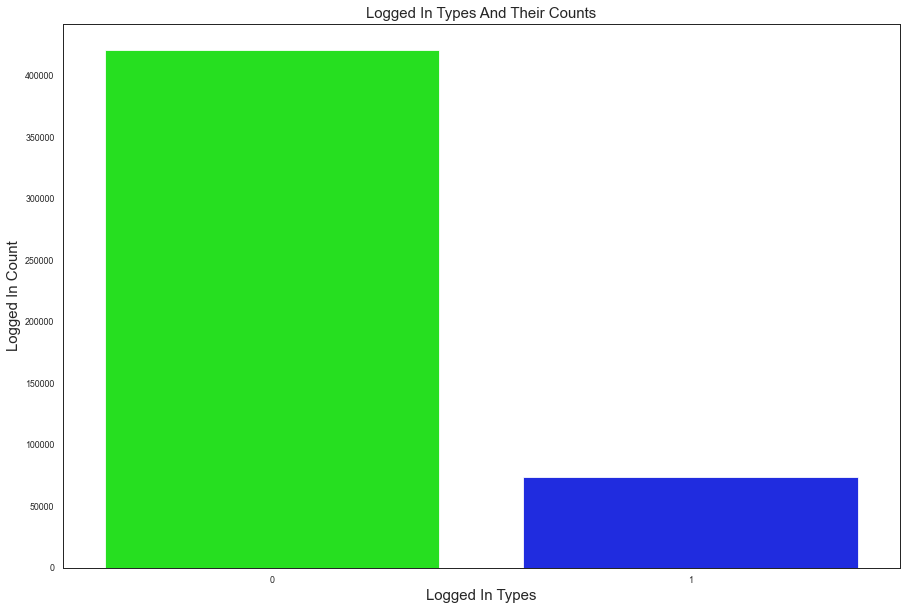

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(x=pd.Series(ism_df['logged_in'].value_counts()).index, y=pd.Series(count_list_logged_in), palette ='hsv')
plt.xlabel('Logged In Types')
plt.ylabel('Logged In Count')
plt.title('Logged In Types And Their Counts')

In [48]:
ism_df['num_file_creations'].value_counts()

0     493756
1        207
2         36
4          7
16         2
9          1
5          1
7          1
8          1
28         1
25         1
12         1
14         1
15         1
20         1
21         1
22         1
10         1
Name: num_file_creations, dtype: int64

In [49]:
ism_df['num_failed_logins'].value_counts()

0    493958
1        57
2         3
5         1
4         1
3         1
Name: num_failed_logins, dtype: int64

In [50]:
ism_df['num_access_files'].value_counts()

0    493567
1       424
2        25
3         2
8         1
6         1
4         1
Name: num_access_files, dtype: int64

# Feature Engineering

In [52]:
ism_df.drop('num_root',axis = 1,inplace = True)


ism_df.drop('srv_serror_rate',axis = 1,inplace = True)


ism_df.drop('srv_rerror_rate',axis = 1, inplace=True)


ism_df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)


ism_df.drop('dst_host_serror_rate',axis = 1, inplace=True)


ism_df.drop('dst_host_rerror_rate',axis = 1, inplace=True)


ism_df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)


ism_df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [53]:
ism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [54]:
ism_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [55]:
ism_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [56]:
ism_df[['target','Attack Type']]

,target,Attack Type
0,normal.,normal
1,normal.,normal
2,normal.,normal
3,normal.,normal
4,normal.,normal
...,...,...
494016,normal.,normal
494017,normal.,normal
494018,normal.,normal
494019,normal.,normal


In [57]:
ism_df[ism_df['target'] != ism_df['Attack Type']+'.']

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
744,184,tcp,telnet,SF,1511,2957,0,0,0,3,...,1.00,0.00,0.0,1,3,0.00,1.00,0.67,buffer_overflow.,u2r
745,305,tcp,telnet,SF,1735,2766,0,0,0,3,...,1.00,0.00,0.0,2,4,0.00,0.50,0.50,buffer_overflow.,u2r
4049,79,tcp,telnet,SF,281,1301,0,0,0,2,...,1.00,0.00,0.0,1,10,0.00,1.00,0.30,loadmodule.,u2r
4113,25,tcp,telnet,SF,269,2333,0,0,0,0,...,1.00,0.00,0.0,69,2,0.06,0.01,0.00,perl.,u2r
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.83,0.33,0.0,5,6,0.00,0.20,0.33,neptune.,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490960,0,udp,private,SF,28,0,0,3,0,0,...,1.00,0.00,0.0,255,96,0.01,0.38,0.00,teardrop.,dos
490961,0,udp,private,SF,28,0,0,3,0,0,...,1.00,0.00,0.0,255,97,0.01,0.38,0.00,teardrop.,dos
490962,0,udp,private,SF,28,0,0,3,0,0,...,1.00,0.00,0.0,255,98,0.01,0.38,0.00,teardrop.,dos
490963,0,udp,private,SF,28,0,0,3,0,0,...,1.00,0.00,0.0,255,99,0.01,0.39,0.00,teardrop.,dos


In [58]:
ism_df['target'].nunique()

23

In [59]:
ism_df['Attack Type'].nunique()

5

In [60]:
ism_df = ism_df.drop('target',axis=1)

In [61]:
ism_df.shape

(494021, 34)

In [62]:
ism_df['flag'].unique()

array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
       'OTH', 'SH'], dtype=object)

In [63]:
ism_df['service'].unique()

array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
       'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
       'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
       'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
       'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
       'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
       'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
       'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
       'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
       'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
      dtype=object)

In [64]:
ism_df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [65]:
ism_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

In [66]:
ism_df_ohe = pd.get_dummies(ism_df, columns=['protocol_type','service','flag'],drop_first=True)

In [67]:
ism_df_ohe.shape

(494021, 108)

In [68]:
ism_df_ohe = ism_df_ohe.head(10000)

In [69]:
columns_arr = ism_df_ohe.drop(['Attack Type'],axis=1).columns

In [70]:
ism_df_ohe.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=108)

In [71]:
for i in range(len(columns_arr)):
    print(columns_arr[i])

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
protocol_type_tcp
protocol_type_udp
service_X11
service_Z39_50
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_hostnames
service_http
service_http_443
service_imap4
service_iso_tsap
service_klogin
service_kshell
service_ldap
service_link
service_login
service_mtp
service_name
service_netbios_dgm
service_netbios_ns
service_netbios_ssn
service_netstat
service

In [72]:
ism_df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 108 entries, duration to flag_SH
dtypes: float64(8), int64(22), object(1), uint8(77)
memory usage: 3.1+ MB


In [73]:
X = ism_df_ohe.drop(['Attack Type'],axis=1).values

In [74]:
ism_df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [75]:
ism_df['Attack Type'].head(10000).unique()

array(['normal', 'u2r', 'dos'], dtype=object)

In [117]:
y = ism_df['Attack Type'].head(10000).values

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating Models

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
model1 = GaussianNB()
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model3 = RandomForestClassifier(n_estimators=30)
model4 = SVC(decision_function_shape="ovo")
model5 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model6 = GradientBoostingClassifier(random_state=0)
print('Models Created Successfully')

Models Created Successfully


# Training Models

In [82]:
model1.fit(X_train_scaled,y_train)
print('Naive Bayes Model Trained')
model2.fit(X_train_scaled,y_train)
print('Decision Tree Model Trained')
model3.fit(X_train_scaled,y_train)
print('RandomForest Model Trained')
model4.fit(X_train_scaled,y_train)
print('SVM Model Trained')
model5.fit(X_train_scaled,y_train)
print('Logistic Regression Model Trained')
model6.fit(X_train_scaled,y_train)
print('Gradient Boosting Model Trained')
print('All Models Trained Successfully')

Naive Bayes Model Trained
Decision Tree Model Trained
RandomForest Model Trained
SVM Model Trained
Logistic Regression Model Trained
Gradient Boosting Model Trained
All Models Trained Successfully


In [83]:
print(f"Naive Bayes          - {round(model1.score(X_test_scaled,y_test)*100,2)} % ")
print(f"DecisionTree         - {round(model2.score(X_test_scaled,y_test)*100,2)} % ")
print(f"RandomForest         - {round(model3.score(X_test_scaled,y_test)*100,2)} % ")
print(f"SVM                  - {round(model4.score(X_test_scaled,y_test)*100,2)} % ")
print(f"Logistic Regression  - {round(model5.score(X_test_scaled,y_test)*100,2)} % ")
print(f"Gradient Boosting    - {round(model6.score(X_test_scaled,y_test)*100,2)} % ")

Naive Bayes          - 99.93 % 
DecisionTree         - 99.93 % 
RandomForest         - 99.87 % 
SVM                  - 99.87 % 
Logistic Regression  - 99.9 % 
Gradient Boosting    - 99.9 % 


# Implementing Our Own Neural Network

In [84]:
import tensorflow as tf

In [85]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [87]:
np.unique(y)

array([0, 1, 2])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
type(X_train)

numpy.ndarray

In [90]:
ann = tf.keras.models.Sequential()

In [91]:
ann.add(tf.keras.layers.Dense(units = 1024, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units = 512, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units = 256, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units = 128, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units = 64, activation='relu'))
ann.add(Dropout(0.2))

ann.add(tf.keras.layers.Dense(units = 3,  activation='softmax'))

In [92]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training Of Our Neural Network

In [93]:
history = ann.fit(X_train_scaled, y_train, batch_size = 32,validation_data=(X_test_scaled,y_test),epochs = 15)

Epoch 1/15
219/219 [==============================] - 6s 17ms/step - loss: 0.0824 - accuracy: 0.9818 - val_loss: 0.1983 - val_accuracy: 0.9927
Epoch 2/15
219/219 [==============================] - 3s 12ms/step - loss: 0.0446 - accuracy: 0.9973 - val_loss: 0.1550 - val_accuracy: 0.9983
Epoch 3/15
219/219 [==============================] - 3s 12ms/step - loss: 0.0166 - accuracy: 0.9999 - val_loss: 0.1515 - val_accuracy: 0.9987
Epoch 4/15
219/219 [==============================] - 3s 13ms/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 0.2252 - val_accuracy: 0.9990
Epoch 5/15
219/219 [==============================] - 3s 13ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.2311 - val_accuracy: 0.9990
Epoch 6/15
219/219 [==============================] - 3s 11ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.2363 - val_accuracy: 0.9990
Epoch 7/15
219/219 [==============================] - 3s 12ms/step - loss: 6.7915e-06 - accuracy: 1.0000 - val_loss: 0.2452 - val_accuracy: 0.

In [94]:
train_loss, train_acc = ann.evaluate(X_train_scaled, y_train, batch_size = 32)
test_loss, test_acc  = ann.evaluate(X_test_scaled, y_test, batch_size = 32)

94/94 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.9993


In [95]:
print(f'Train Loss     =  {round(train_loss,3)}')
print(f'Train Accuracy =  {round(train_acc * 100,2)} %')
print('\n******************************\n')
print(f'Test Loss      =  {round(test_loss,3)}')
print(f'Test Accuracy  =  {round(test_acc * 100,2)} %')

Train Loss     =  0.0
Train Accuracy =  100.0 %

******************************

Test Loss      =  0.385
Test Accuracy  =  99.93 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


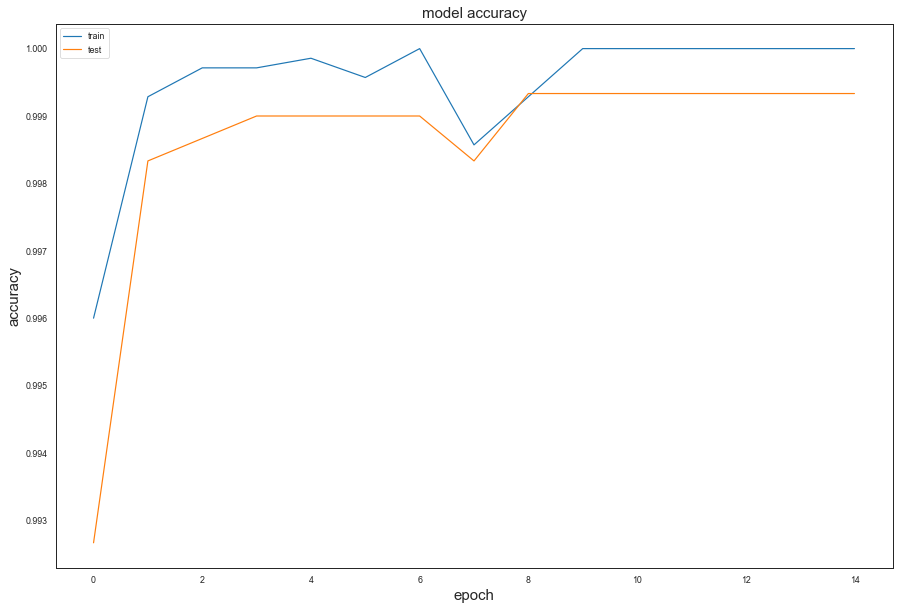

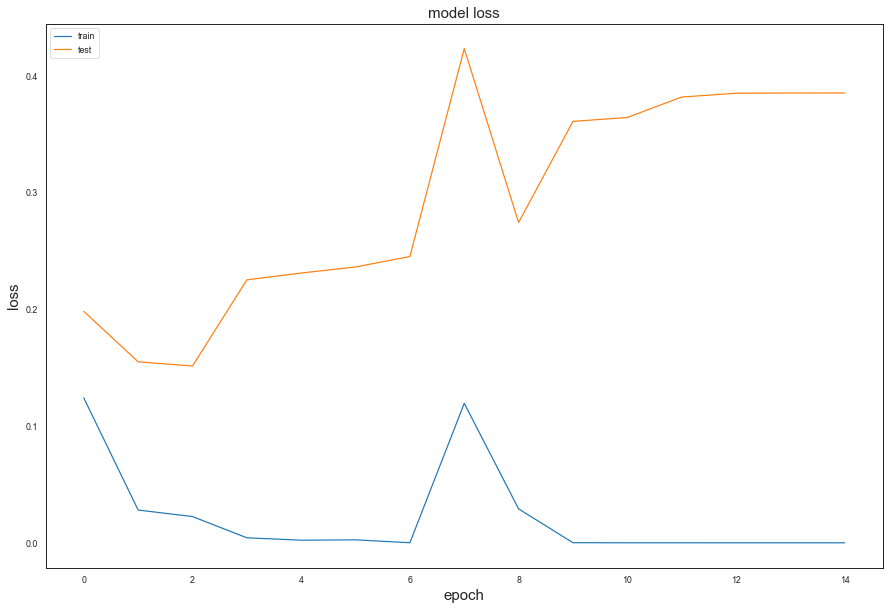

In [96]:
# list all data in history
plt.figure(figsize=(15,10))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving The Model

In [97]:
ann.save('./model.h5')

# Model Loading

In [98]:
from tensorflow.keras.models import load_model
model = load_model('./model.h5')

In [99]:
test_loss, test_acc  = model.evaluate(X_test_scaled, y_test, batch_size = 32)

94/94 [==============================] - 1s 4ms/step - loss: 0.3853 - accuracy: 0.9993


In [100]:
X_train_scaled[0].shape

(107,)

# Prediction From The Loaded Model

In [101]:
print(ann.predict([[X_test_scaled[2].reshape(-1,107)]]))
print("***********************************************")
print(model.predict([[X_test_scaled[2].reshape(-1,107)]]))

Consider rewriting this model with the Functional API.
[[1. 0. 0.]]
***********************************************
[[1. 0. 0.]]


In [102]:
#X_train_scaled[0].reshape(-1,107).shape

In [103]:
np.argmax(model.predict([[X_test_scaled[2].reshape(-1,107)]]).flatten())

0

In [104]:
#X_test_scaled[2].reshape(1,107)